In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
le = LabelEncoder()
rf = RandomForestClassifier()

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.shape

(7032, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop('customerID', axis = 'columns', inplace = True)

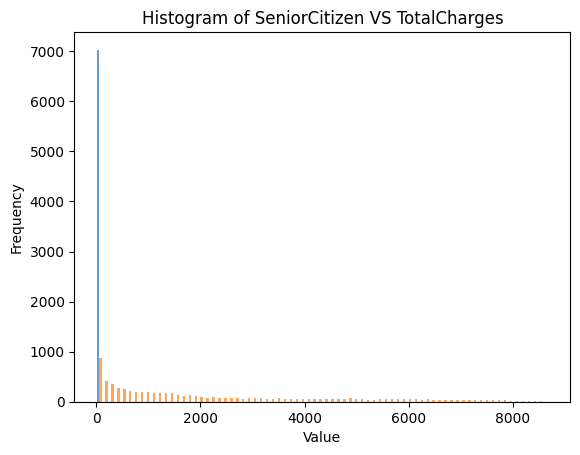

In [28]:
plt.hist([df.SeniorCitizen,df.TotalCharges], bins='auto', alpha=0.7, label=['SeniorCitizen', 'TotalCharges'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of SeniorCitizen VS TotalCharges')
plt.show();

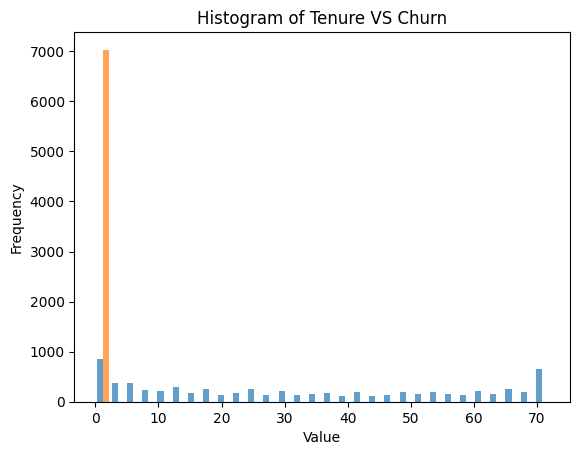

In [24]:
plt.hist([df.tenure, df.Churn], bins='auto', alpha=0.7, label=['Tenure', 'Churn'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure VS Churn')
plt.show();

In [13]:
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.dropna(axis = 'rows', inplace = True)

In [ ]:
X = df.drop('Churn', axis = 'columns')
y = df.Churn

In [ ]:
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
# Create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Display the updated DataFrame
balanced_data.PaymentMethod.unique()

array([2, 3, 0, 1])

In [ ]:
A = balanced_data.drop('Churn', axis = 'columns')
B = balanced_data.Churn
A = sc.fit_transform(A)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size = 0.2, random_state = 42)

In [ ]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8407550822846079

In [ ]:
# Pipeline for Random Forest Classifier
rfc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
])

# Parameters Grid for Random Forest Classifier
rfc_param_grid = {
    'rfc__n_estimators': [100, 200, 300, 500, 1000],
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__max_depth': [None, 5, 10, 20],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__max_features': ['sqrt', 'log2', None],
    'rfc__bootstrap': [True, False],
    'rfc__class_weight': [None, 'balanced', 'balanced_subsample']
}

# Grid Search for Random Forest Classifier
rfc_grid_search = RandomizedSearchCV(rfc_pipeline, rfc_param_grid, cv=5, scoring='accuracy', n_iter=10)

# Fitting for Random Forest Classifier
rfc_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score for the pipeline
print("Best Hyperparameters for Random Forest Classifier:")
print(rfc_grid_search.best_params_)
print("Best Score for Random Forest Classifier:", rfc_grid_search.best_score_)

Best Hyperparameters for Random Forest Classifier:
{'rfc__n_estimators': 300, 'rfc__min_samples_split': 5, 'rfc__min_samples_leaf': 4, 'rfc__max_features': 'sqrt', 'rfc__max_depth': 20, 'rfc__criterion': 'entropy', 'rfc__class_weight': None, 'rfc__bootstrap': False}
Best Score for Random Forest Classifier: 0.8435835351089589


In [ ]:
y_preds = rfc_grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm

array([[866, 171],
       [157, 872]])

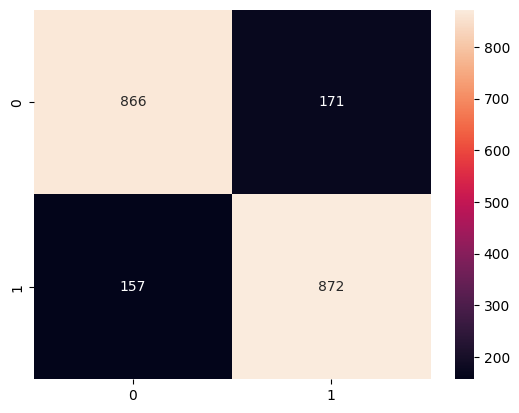

In [ ]:
sns.heatmap(cm, annot = True, fmt = 'g');

In [ ]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1037
           1       0.84      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [ ]:
balanced_data.to_csv("ML READY TELCO_CHURN.csv")

In [ ]:
pickle.dump(rfc_grid_search, open('model.pkl', 'wb'))